In [1]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [5]:
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))                 

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9296 - loss: 0.2337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9714 - loss: 0.0950
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9794 - loss: 0.0652
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9836 - loss: 0.0511
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9865 - loss: 0.0403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9889 - loss: 0.0342
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9891 - loss: 0.0309
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9912 - loss: 0.0264
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9923 - loss: 0.0228
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9921 - loss: 0.0231


In [9]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0604


[0.06041766330599785, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.9850


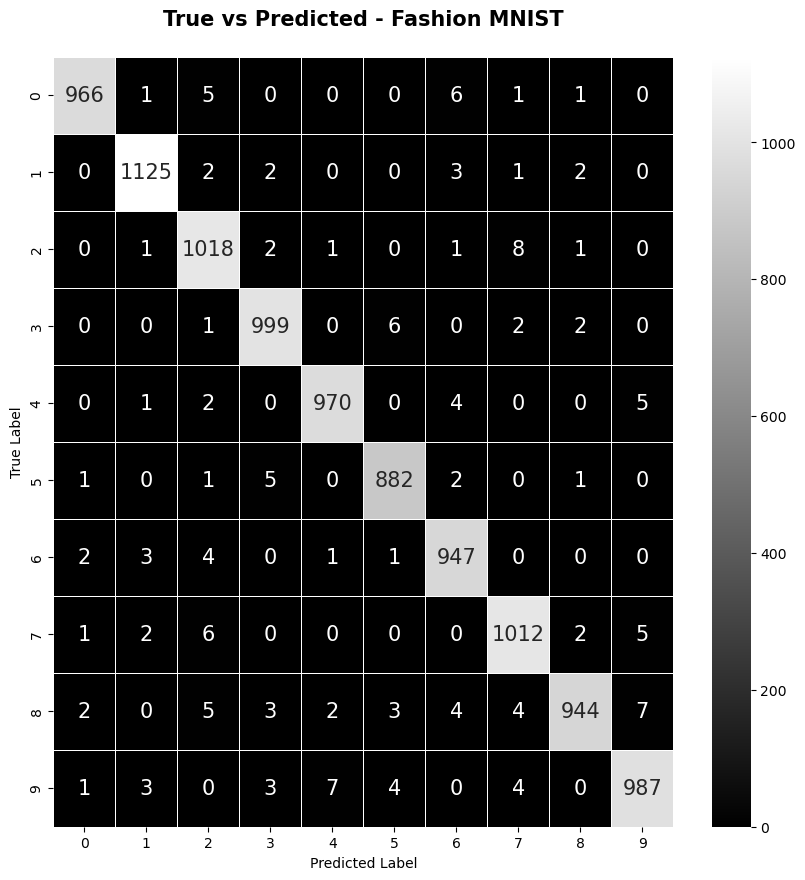

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions for all test samples
y_predict_fash = model.predict(X_test)              # shape: (10000, 10)
y_predict_fash = np.argmax(y_predict_fash, axis=1)  # shape: (10000,)

# Case 1: if y_test is one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_fash_eval = np.argmax(y_test, axis=1)
# Case 2: if y_test is already integer labels
else:
    y_test_fash_eval = y_test

# Confusion Matrix
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

# Accuracy
acc = accuracy_score(y_test_fash_eval, y_predict_fash)
print(f"Test Accuracy: {acc:.4f}")

# Plot
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True vs Predicted - Fashion MNIST\n', fontweight='bold', fontsize=15)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9931 - loss: 0.0192 - val_accuracy: 0.9851 - val_loss: 0.0638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9839 - val_loss: 0.0611
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9936 - loss: 0.0183 - val_accuracy: 0.9841 - val_loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9938 - loss: 0.0166 - val_accuracy: 0.9862 - val_loss: 0.0629
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9853 - val_loss: 0.0727
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.9847 - val_loss: 0.0706
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9856 - val_loss: 0.0763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9952 -

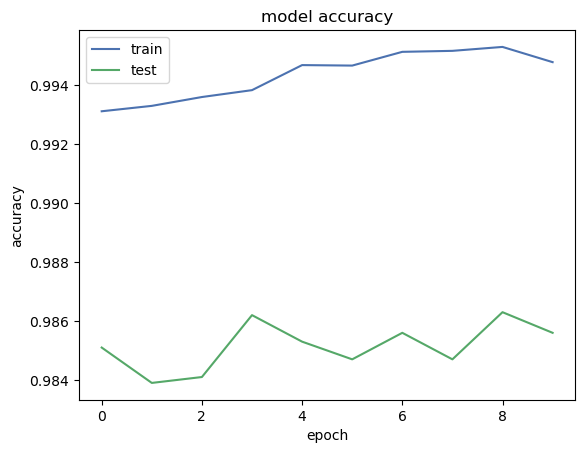

In [12]:
# summarize history for accuracy
history = model.fit(
    X_train, y_train,                 # training data and labels
    validation_data=(X_test, y_test), # validation data and labels
    epochs=10,                        # number of training epochs
    batch_size=32                      # batch size
)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

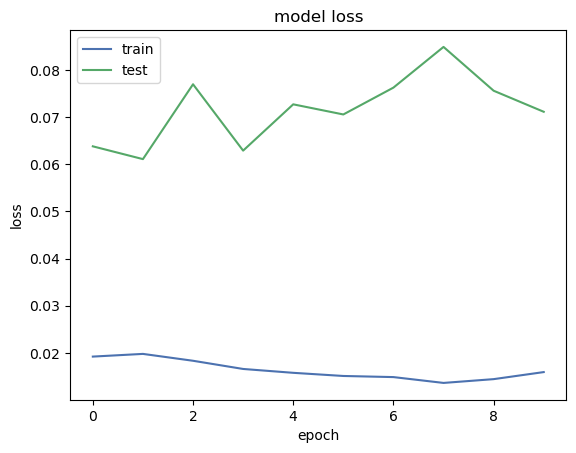

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [35]:
# For CNN (28x28x1)
y_predict = model.predict(X_test[0].reshape(1, 28, 28, 1))  # reshape to (1,28,28,1)
y_predict = np.argmax(y_predict)

# True label
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_digit_eval = np.argmax(y_test[0])
else:
    y_test_digit_eval = y_test[0]

print("Predicted:", y_predict)
print("Actual:", y_test_digit_eval)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: 7
Actual: 7


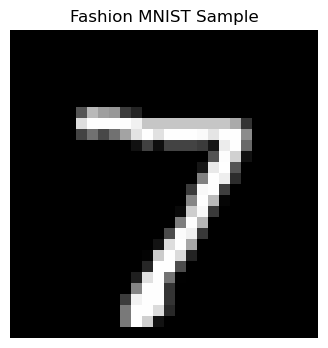

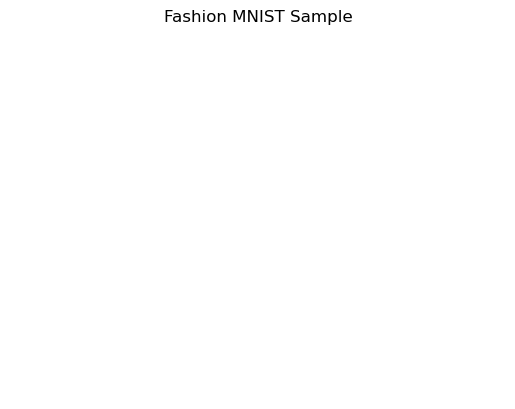

In [45]:
# Names of Fashion MNIST classes
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Pick the first test sample
img = X_test[0]

# If your images are flattened (MLP), reshape to 28x28
if img.shape == (784,):
    img = img.reshape(28,28)

# Get true label
if y_test.ndim > 1 and y_test.shape[1] > 1:
    true_label = np.argmax(y_test[0])
else:
    true_label = int(y_test[0])  # convert scalar to int

# Get predicted label
if isinstance(y_predict, np.ndarray):
    # If y_predict is an array of predictions
    pred_label = int(y_predict[0])
else:
    # If y_predict is a single integer
    pred_label = int(y_predict)

# Plot the image
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.xlabel(f"Actual: {class_names[true_label]}, Pred: {class_names[pred_label]}")
plt.title("Fashion MNIST Sample")
plt.axis('off')
plt.show()

plt.xlabel(f"Actual: {class_names[true_label]}, Pred: {class_names[pred_label]}")
plt.title("Fashion MNIST Sample")
plt.axis('off')
plt.show()
